In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import easygui

In [3]:


def pubFigStyle():
    plt.rcParams['svg.fonttype'] = 'none'
    plt.rcParams['font.sans-serif'] = "Arial"

    sns.set_style('ticks')
    sns.set_context("paper", rc={"font.size":5,"axes.titlesize":6,"axes.labelsize":7,'lines.linewidth' : 1,'lines.markersize' :1,
                                 'xtick.labelsize' : 6,'ytick.labelsize' : 6,'legend.fontsize':6,'legend.fancybox':False,
                                'legend.frameon':False})   
%matplotlib notebook
pubFigStyle()

In [12]:
filename='/home/rhagoletis/Downloads/HeatMap_Antennae_matrix.txt'

<IPython.core.display.Javascript object>


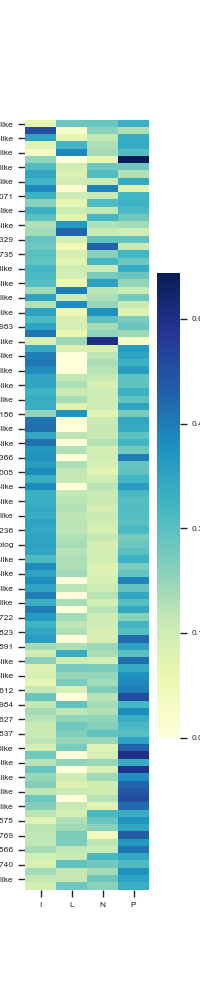

In [18]:
def heatmap(filename):
    df=pd.read_csv(filename,sep='\t',)
    df=df.iloc[:,0:5]
    df.index=df.Names
    df=df.drop('Names',axis=1)
    df=df.dropna()
    df2=df.div(df.sum(axis=1), axis=0)
    f,ax=plt.subplots(1,1,figsize=(2,10))
    sns.heatmap(data=df2,cmap="YlGnBu",ax=ax)
    plt.savefig('heatmap.svg',transparent=True,papertype='A4',frameon=False,)
heatmap('/home/rhagoletis/Downloads/HeatMap_Antennae_matrix.txt')

In [21]:
def volcano(filename,xmin=1,ymin=0,ymax=0.05,figsize=(6,6)):

    df=pd.read_csv(filename,sep='\t')
    df.index=df.Field1
    df.head()


    df2=df[(df.log2FoldChange.abs()>xmin) & (df.p_value>ymin)& (df.p_value<ymax)]
    df2.p_value=-np.log10(df2.p_value)
    df.p_value=-np.log10(df.p_value)
    
    
    f,ax=plt.subplots(1,1,figsize=figsize)

    plt.scatter(df.log2FoldChange,df.p_value,c='k',)
    plt.scatter(df2.log2FoldChange,(df2.p_value),c='r')
    # plt.yscale('log')
    # plt.xscale('log',basex=2)



    for k, v in df2[['log2FoldChange','p_value']].iterrows():
        ax.annotate(k, v,fontsize=5)
    ax.set_ylabel('-log10(p-value)')
    ax.set_xlabel('-log2(Fold change)')
    ax.set_ylim(0,5)
    ax.set_xlim(-4,4)


    sns.despine(trim=True,offset=10)

    plt.savefig('volcanoOver'+filename.split('/')[-1]+'.svg',transparent=True,papertype='A4',frameon=False,)


In [4]:
from adjustText import adjust_text

<IPython.core.display.Javascript object>


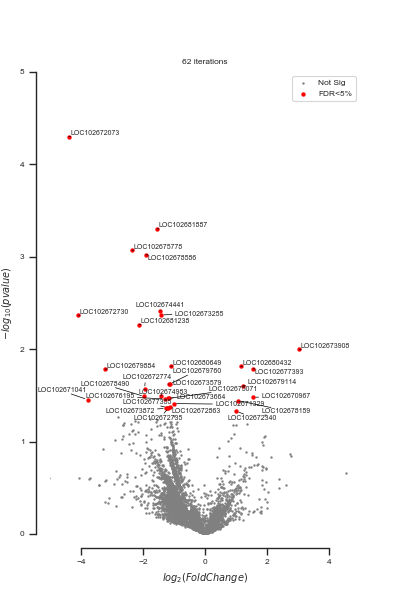

In [18]:


# data = pd.read_csv('../../figures/volcano_data.csv')


def plot_volcano(filename='/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/geetha/I_L_updated.txt',adjust=False, **kwargs):
    
    data=pd.read_csv(filename,sep='\t')

    plt.figure(figsize=(4,6))
    threshold = 0.05
    xns, yns = data['log2FoldChange'][data['p_value']>=threshold], -np.log10(data['p_value'][data['p_value']>=threshold])
    plt.scatter(xns, yns, c='grey', edgecolor=(1,1,1,0), label='Not Sig',s=3)
    xs, ys = data['log2FoldChange'][data['p_value']<threshold], -np.log10(data['p_value'][data['p_value']<threshold])
    plt.scatter(xs, ys, c='r', edgecolor=(1,1,1,0), label='FDR<5%',s=10)
    texts = []
    for x, y, l in zip(xs, ys, data['Field1'][data['p_value']<threshold]):
        texts.append(plt.text(x, y, l, size=5))
    plt.legend()
    plt.xlabel('$log_2(Fold Change)$')
    plt.ylabel('$-log_{10}(pvalue)$')
    if adjust:
        plt.title('%s iterations' % adjust_text(texts,
                                                arrowprops=dict(arrowstyle="-", color='k', lw=0.5), **kwargs))
#     ax.set_ylim(0,5)
#     ax.set_xlim(-4,4)
    plt.xlim(-5,5)
    plt.ylim(0,5)

    sns.despine(trim=True,offset=10)
    
    plt.savefig('volcano'+filename.split('/')[-1]+'.svg',transparent=True,papertype='A4',frameon=False,)

_ = plot_volcano(adjust=True)



In [152]:
data=pd.read_csv('/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/geetha/I_L_updated.txt',sep='\t')

In [153]:
data

,Field1,description,value_I,value_L,p_value,ABS_FC,log2FoldChange,FPKM
0,LOC102672294,probable_serine/threonine-protein_kinase_irlA-...,11.43410,11.43720,0.99990,1.000272,0.000393,2
1,LOC102681150,40S_ribosomal_protein_S9-like,544.93400,545.00500,0.99990,1.000131,0.000188,2
2,LOC102674082,vam6/Vps39-like_protein-like,24.13320,24.13560,0.99985,1.000098,0.000141,2
3,LOC102670759,gamma-secretase_subunit_Aph-1-like,49.25270,49.23320,0.99955,1.000395,-0.000570,2
4,LOC102679789,putative_phospholipase_B-like_lamina_ancestor-...,91.95260,91.92990,0.99955,1.000246,-0.000355,2
5,LOC102674782,"probable_citrate_synthase_1,_mitochondrial-like",199.42200,199.49300,0.99950,1.000356,0.000514,2
6,LOC102671125,serine/arginine_repetitive_matrix_protein_2-like,48.75640,48.79130,0.99945,1.000717,0.001034,2
7,LOC102678712,hornerin-like,307.58000,307.52000,0.99945,1.000197,-0.000284,2
8,LOC102672716,protein_sarah-like,37.39540,37.42350,0.99935,1.000751,0.001084,2
9,LOC102674702,potassium_voltage-gated_channel_protein_Shal-like,44.48070,44.50480,0.99935,1.000542,0.000781,2


In [13]:
# fileList=easygui.fileopenbox(multiple=True)
fileList=['/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/geetha/I_L_updated.txt',
 '/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/geetha/I_N_updated.txt',
 '/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/geetha/I_P_updated.txt']
# filename='/home/rhagoletis/Downloads/I_L_updated.txt'

<IPython.core.display.Javascript object>


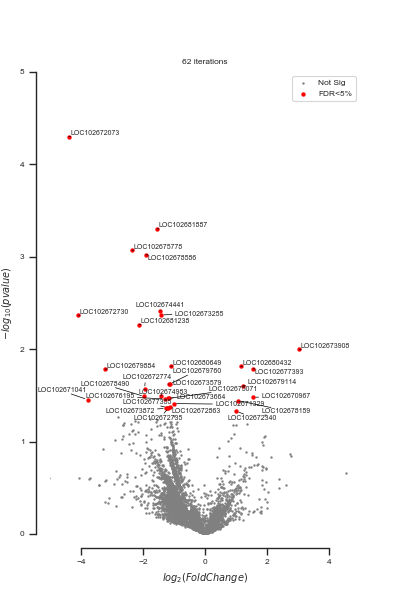

<IPython.core.display.Javascript object>


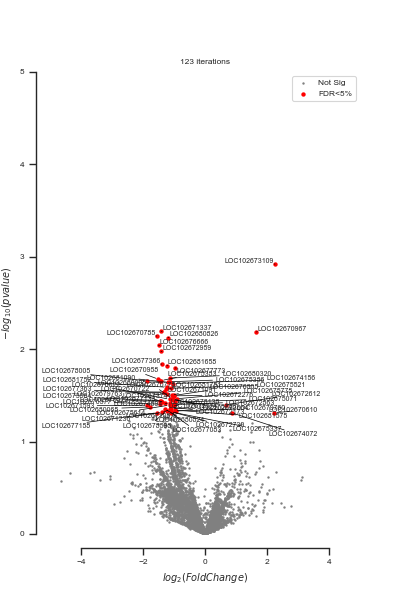

<IPython.core.display.Javascript object>


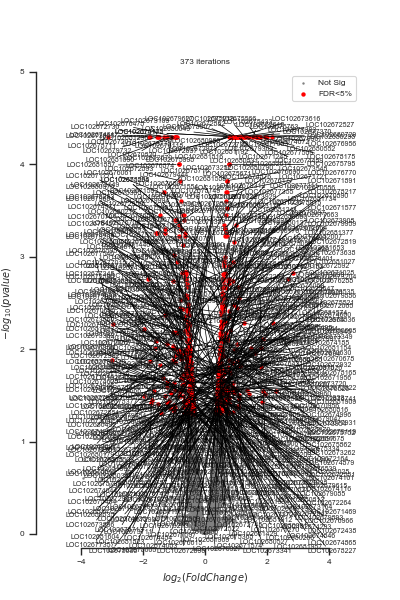

In [20]:
for filename in fileList:
#     volcano(filename)
    _ = plot_volcano(filename,adjust=True)


In [139]:
xmin=1
# xmax=1.5
ymin=0
ymax=0.05


df=pd.read_csv(filename,sep='\t')
df.index=df.description
df.head()


df2=df[(df.log2FoldChange.abs()>xmin) & (df.p_value>ymin)& (df.p_value<ymax)]
df2.p_value=-np.log10(df2.p_value)
df.p_value=-np.log10(df.p_value)

<IPython.core.display.Javascript object>


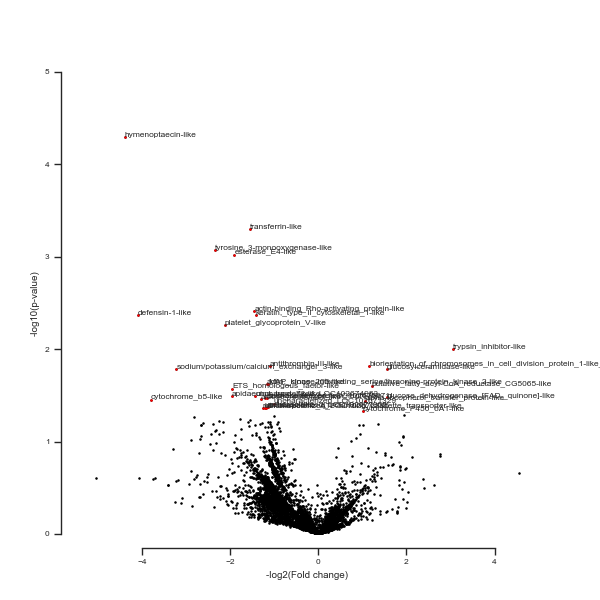

In [138]:
f,ax=plt.subplots(1,1,figsize=(6,6))

plt.scatter(df.log2FoldChange,df.p_value,c='k',)
plt.scatter(df2.log2FoldChange,(df2.p_value),c='r')
# plt.yscale('log')
# plt.xscale('log',basex=2)



for k, v in df2[['log2FoldChange','p_value']].iterrows():
    ax.annotate(k, v)
ax.set_ylabel('-log10(p-value)')
ax.set_xlabel('-log2(Fold change)')
ax.set_ylim(0,5)

sns.despine(trim=True,offset=10)

plt.savefig('volcano.svg',transparent=True,papertype='A4',frameon=False,)


In [135]:
plt.gca().invert_yaxis()

Text(0.5,29.7167,'-log2(Fold change)')

In [113]:
plt.savefig('volcano.svg',transparent=True,papertype='A4',frameon=False,)
